# 1. 준비
## (1) 패키지 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## (2) 데이터 불러오기

In [2]:
d = pd.read_parquet('005930.parquet')

## (3) 데이터 준비

In [3]:
d['5d_max'] = d.rolling(5)['close'].max() # 오늘 포함 과거 5일 종가 중 최고값
d['5d_min'] = d.rolling(5)['close'].min() # 오늘 포함 과거 5일 종가 중 최저값
d['last_1d_close'] = d['close'].shift(1) # 전일 종가
d['20d_mean'] = d.rolling(20)['close'].mean() # 20일 이동평균

buy = d[(d['close'] == d['5d_min']) & (d['close'] < d['20d_mean'])]

---
# 2. 진짜 간단한 백테스팅 툴 개발

In [6]:
holding_cash = 1_000_000 # 보유 현금
position = 0 # 현재 보유 포지션
avg_price = 0 # 평단가
daily_total_value = [] # 일별 총 포트폴리오 가치

for idx,data in d.iterrows():
    daily_total_value.append(0)

    if data['close'] < data['20d_mean'] and position == 0:
        holding_cash -= 1 * data['close']
        position += 1
        avg_price = data['close']
    elif position > 0:
        holding_cash += position * data['close']
        position = 0
        avg_price = 0

    daily_total_value[-1] += holding_cash + position * data['close']


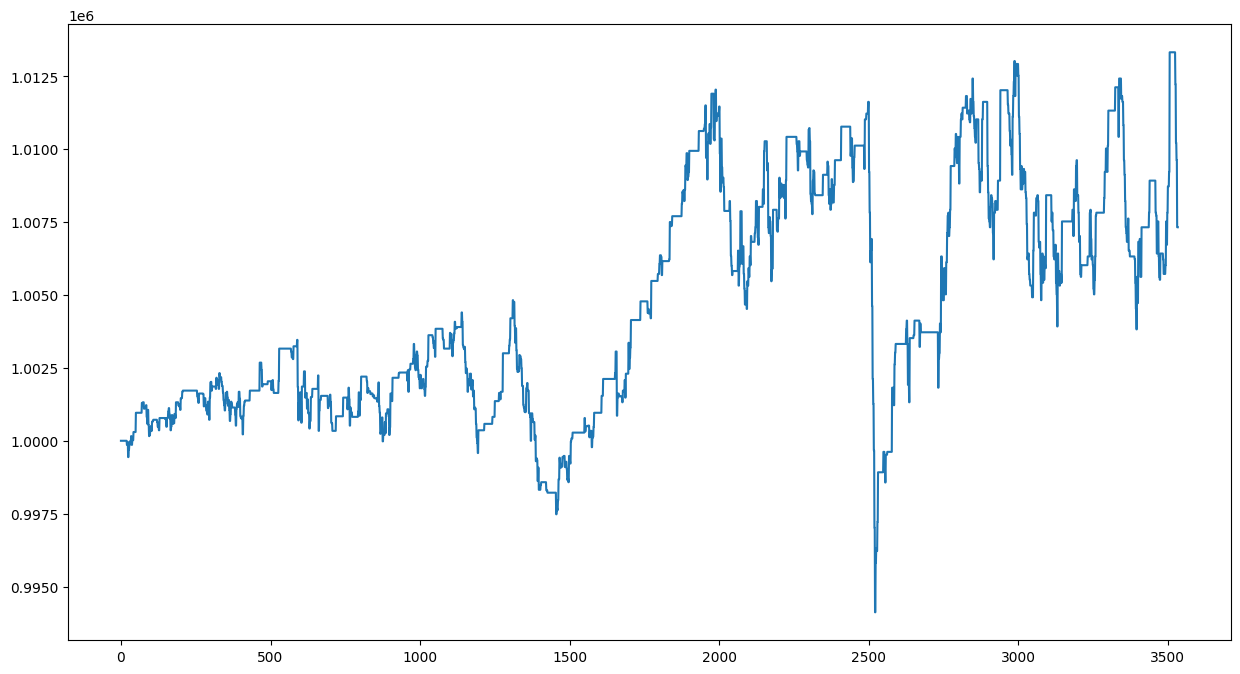

In [7]:
plt.figure(figsize=(15,8))
plt.plot(daily_total_value)